# Explore Vancouver Meetups

In [198]:
import datetime
import matplotlib.pyplot as plt
import math
import meetup.api
import os
import pandas as pd
import pprint
import requests

%matplotlib inline

In [3]:
API_KEY = os.environ['MEETUP_API_KEY']
client = meetup.api.Client(API_KEY)

---

## Categories

In [20]:
categories = client.GetCategories()

29/30 (10 seconds remaining)


In [28]:
categories.meta

{'next': '',
 'method': 'Categories',
 'total_count': 33,
 'link': 'https://api.meetup.com/2/categories',
 'count': 33,
 'description': 'Returns a list of Meetup group categories',
 'lon': 'None',
 'title': 'Categories',
 'url': 'https://api.meetup.com/2/categories?offset=0&format=json&page=200&key=48f48112b3058e21767448548572a&order=shortname&desc=false',
 'id': '',
 'updated': 1450292956000,
 'lat': 'None'}

In [54]:
results = categories.results
print("ID\tName\t\t\t\tShort Name")
for result in results:
    print(f"{result['id']:<5} {result['name']:<30}{result['shortname']}")

ID	Name				Short Name
1     Arts & Culture                Arts
18    Book Clubs                    Book Clubs
2     Career & Business             Business
3     Cars & Motorcycles            Auto
4     Community & Environment       Community
5     Dancing                       Dancing
6     Education & Learning          Education
8     Fashion & Beauty              Fashion
9     Fitness                       Fitness
10    Food & Drink                  Food & Drink
11    Games                         Games
13    Movements & Politics          Movements
14    Health & Wellbeing            Well-being
15    Hobbies & Crafts              Crafts
16    Language & Ethnic Identity    Languages
12    LGBT                          LGBT
17    Lifestyle                     Lifestyle
20    Movies & Film                 Films
21    Music                         Music
22    New Age & Spirituality        Spirituality
23    Outdoors & Adventure          Outdoors
24    Paranormal                    Parano

---

## Explore Cities

In [78]:
cities_resp = client.GetCities(country='Canada', query='Vancouver')

29/30 (10 seconds remaining)


In [79]:
cities_resp.meta

{'next': '',
 'method': 'Cities',
 'total_count': 2,
 'link': 'https://api.meetup.com/2/cities',
 'count': 2,
 'description': "Returns Meetup cities. This method supports search by latitude/longitude/radius, by country/state, by query term/zip, or a combination of all of these. Location-only searches by lat and lon return all cities within a radius of the provided coordinates. Searches with a query return up to 10 cities matching the term, and can be sorted by size or distance to a given coordinate. 'smart' ordering can be used to return the match(es) with the highest member_count, unless a smaller size match exists nearby the given coordinates. Query searches are supported for country but not country and state",
 'lon': 'None',
 'title': 'Cities',
 'url': 'https://api.meetup.com/2/cities?offset=0&query=Vancouver&format=json&page=200&radius=50&key=48f48112b3058e21767448548572a&order=size&desc=false',
 'id': '',
 'updated': 1263132772000,
 'lat': 'None'}

In [80]:
type(cities_resp)

meetup.api.MeetupObject

In [71]:
cities = {}

cities_result = cities_resp.results

for result in cities_result:
    city = result['city']
    if city in cities:
        print(f"ERROR: {city} already in dictionary!")
    else:
        cities[result['city']] = result

In [77]:
city_names = list(cities.keys())
sorted(city_names)

['Anola',
 'Argyle',
 'Arnaud',
 'Aubigny',
 'Beaconia',
 'Beauséjour',
 'Blumenort',
 'Brunkild',
 'Bélair',
 'Carlowrie',
 'Carman',
 'Cartier',
 'Dacotah',
 'Domain',
 'Dufresne',
 'Dufrost',
 'Dugald',
 'East Braintree',
 'East Selkirk',
 'East St Paul',
 'Elm Creek',
 'Fannystelle',
 'Fort Alexander',
 'Garson',
 'Ginew',
 'Giroux',
 'Glenlea',
 'Grand Marais',
 'Grande Pointe',
 'Graysville',
 'Green Ridge',
 'Grunthal',
 'Gunton',
 'Haywood',
 'Hazelridge',
 'Headingley',
 'High Bluff',
 'Homewood',
 'Howden',
 'Ile des Chenes',
 'Inwood',
 'Kleefeld',
 'Komarno',
 'La Barriere',
 'La Broquerie',
 'La Salle',
 'Lac du Bonnet',
 'Landmark',
 'Lavenham',
 'Libau',
 'Lockport',
 'Lorette',
 'Lowe Farm',
 'Macdonald',
 'Malonton',
 'Marchand',
 'Marius',
 'Marquette',
 'Matlock',
 'Miami',
 'Mitchell',
 'Morden',
 'Morris',
 'New Bothwell',
 'Newton Siding',
 'Niverville',
 'Oak Bluff',
 'Oak Point',
 'Oakbank',
 'Oakville',
 'Otterburne',
 'Pine Falls',
 'Plum Coulee',
 'Poplar Poi

In [82]:
cities_resp.results

[{'zip': 'V5K 0A1',
  'country': 'ca',
  'localized_country_name': 'Canada',
  'city': 'Vancouver',
  'lon': -123.04000091552734,
  'ranking': 0,
  'id': 857064,
  'state': 'BC',
  'member_count': 39959,
  'name_string': 'Vancouver, British Columbia, Canada',
  'lat': 49.279998779296875},
 {'zip': '98660',
  'country': 'us',
  'localized_country_name': 'USA',
  'city': 'Vancouver',
  'lon': -122.68000030517578,
  'ranking': 1,
  'id': 98660,
  'state': 'WA',
  'member_count': 4699,
  'name_string': 'Vancouver, Washington, USA',
  'lat': 45.63999938964844}]

---

## Explore Groups

In [158]:
# searching for Vancouver, Canda tech groups
group_resp = client.GetGroups(category_id=34, city='Vancouver', country='ca', offset=0)

29/30 (10 seconds remaining)


In [104]:
dir(group_resp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'meta',
 'results']

In [156]:
group_resp.meta

{'next': 'https://api.meetup.com/2/groups?country=ca&offset=1&city=Vancouver&format=json&lon=-123.040000916&category_id=34&page=0&radius=25.0&fields=&key=48f48112b3058e21767448548572a&lat=49.2799987793&order=id&desc=false',
 'method': 'Groups',
 'total_count': 431,
 'link': 'https://api.meetup.com/2/groups',
 'count': 0,
 'description': 'None',
 'lon': -123.04000091552734,
 'title': 'Meetup Groups v2',
 'url': 'https://api.meetup.com/2/groups?country=ca&offset=0&city=Vancouver&format=json&lon=-123.040000916&category_id=34&page=0&radius=25.0&fields=&key=48f48112b3058e21767448548572a&lat=49.2799987793&order=id&desc=false',
 'id': '',
 'updated': 1549153925000,
 'lat': 49.279998779296875}

In [159]:
group_resp.results

[{'utc_offset': -28800000,
  'country': 'CA',
  'visibility': 'public',
  'city': 'Vancouver',
  'timezone': 'Canada/Pacific',
  'created': 1034097731000,
  'topics': [{'urlkey': 'smallbiz', 'name': 'Small Business', 'id': 389},
   {'urlkey': 'marketing', 'name': 'Marketing', 'id': 1238},
   {'urlkey': 'socialnetwork', 'name': 'Social Networking', 'id': 4422},
   {'urlkey': 'wordpress', 'name': 'WordPress', 'id': 8304},
   {'urlkey': 'creative-writing', 'name': 'Creative Writing', 'id': 15322},
   {'urlkey': 'social-media', 'name': 'Social Media', 'id': 15401},
   {'urlkey': 'online-marketing', 'name': 'Online Marketing', 'id': 15585},
   {'urlkey': 'professional-networking',
    'name': 'Professional Networking',
    'id': 15720},
   {'urlkey': 'writing', 'name': 'Writing', 'id': 16728},
   {'urlkey': 'small-business-marketing-strategy',
    'name': 'Small Business Marketing Strategy',
    'id': 17325},
   {'urlkey': 'social-media-marketing',
    'name': 'Social Media Marketing',
    

In [160]:
group_results = group_resp.results

In [161]:
len(group_results)

200

In [110]:
first_group = group_results[0]

In [111]:
pprint.pprint(first_group)

{'category': {'id': 34, 'name': 'tech', 'shortname': 'tech'},
 'city': 'Vancouver',
 'country': 'CA',
 'created': 1034097731000,
 'description': '<p><span>The Vancouver Blogger Meetup Group is a platform '
                'where blogger and social media professionals and enthusiasts '
                'interact and network. This platform aims to be a reference '
                'and provide valuable information to graduates, professionals, '
                'small and medium sized businesses.&nbsp;<br><br>We are '
                'currently working on revitalizing this MeetUp Group and will '
                'soon bring up some topics for Meetups. Please, join our group '
                'and feel free to contact us at any time. Stay '
                'tuned!&nbsp;<br><br>Thank you and enjoy!</span></p>',
 'group_photo': {'base_url': 'https://secure.meetupstatic.com',
                 'highres_link': 'https://secure.meetupstatic.com/photos/event/2/4/f/f/highres_438549471.jpeg',
        

---

## Convert to DataFrame

In [175]:
group_ids = []
group_names = []
group_members = []
group_ratings = []
group_join_modes = []
group_urlnames = []

print("ID|Group Name|Members|Rating|Join_Mode|URL_Name|")
for group in group_results:
    print(f"{group['id']}|{group['name']}|{group['members']}|{group['rating']}|{group['join_mode']}|{group['urlname']}")
    group_ids.append(group['id'])
    group_names.append(group['name'])
    group_members.append(group['members'])
    group_ratings.append(group['rating'])
    group_join_modes.append(group['join_mode'])
    group_urlnames.append(group['urlname'])

ID|Group Name|Members|Rating|Join_Mode|URL_Name|
21636|The Vancouver Blogger Meetup Group|653|4.32|approval|The-Vancouver-Blogger-Meetup-Group
71383|The Vancouver Graphic & Communication Design Meetup|1874|4.25|open|vancouver-graphic-design
144695|VanDev: Vancouver's Software Developers Network|6922|4.39|open|VanDev
229052|The Vancouver Web Design Meetup Group|4961|4.4|open|webdesign-395
573925|Vancouver Ruby Meetup Group|2615|4.59|open|vancouver-ruby
599396|Third Tuesday Vancouver|1207|4.4|open|third-tuesday-vancouver
671303|SEMPO Cities Vancouver|567|4.49|open|SEMPOCitiesVancouver
1013148|NetSquared Vancouver: Tech4Good and Nonprofits|3360|4.38|open|net2van
1151411|The Vancouver Java Users Group|1033|4.32|open|vanjug
1201260|djangovan: The Django Vancouver Meetup Group|571|4.79|open|djangovan
1389656|Lean Agile|1162|4.7|open|LeanAgile
1438007|The Vancouver WordPress Meetup Group|2672|4.49|open|Vancouver-WordPress-Meetup-Group
1451498|ViDIA (AKA Vancouver iDevelopers)|2175|4.63|open|V

In [176]:
# create dataframe to hold the data
# group name|members|rating|join mode|url name
df = pd.DataFrame()

df['id'] = group_ids
df['name'] = group_names
df['members'] = group_members
df['rating'] = group_ratings
df['join_mode'] = group_join_modes
df['urlname'] = group_urlnames

In [177]:
df.head()

,id,name,members,rating,join_mode,urlname
0,21636,The Vancouver Blogger Meetup Group,653,4.32,approval,The-Vancouver-Blogger-Meetup-Group
1,71383,The Vancouver Graphic & Communication Design M...,1874,4.25,open,vancouver-graphic-design
2,144695,VanDev: Vancouver's Software Developers Network,6922,4.39,open,VanDev
3,229052,The Vancouver Web Design Meetup Group,4961,4.40,open,webdesign-395
4,573925,Vancouver Ruby Meetup Group,2615,4.59,open,vancouver-ruby


---
## Explore Members

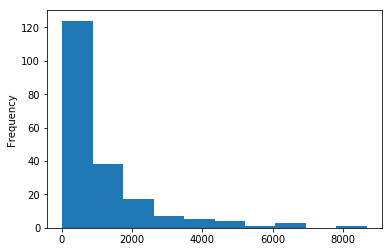

In [143]:
df['members'].plot.hist()

In [145]:
print("Min Members:", df['members'].min(), "|Max Members:", df['members'].max())

Min Members: 18 |Max Members: 8672


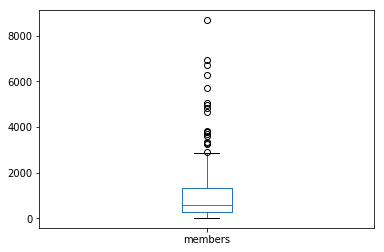

In [147]:
df['members'].plot.box()

In [149]:
df['members'].value_counts(bins = 10, normalize=True).sort_index(ascending=False) * 100

(7806.6, 8672.0]     0.5
(6941.2, 7806.6]     0.0
(6075.8, 6941.2]     1.5
(5210.4, 6075.8]     0.5
(4345.0, 5210.4]     2.0
(3479.6, 4345.0]     2.5
(2614.2, 3479.6]     3.5
(1748.8, 2614.2]     8.5
(883.4, 1748.8]     19.0
(9.345, 883.4]      62.0
Name: members, dtype: float64

---

## Getting all Tech Meetup Groups

In [172]:
# searching for Vancouver, Canada meetups
meetup_groups = []

group_resp = client.GetGroups(category_id = 34, city='Vancouver', country='ca', offset=0)
total_count = group_resp.meta['total_count']
num_groups = len(group_resp.results)
meetup_groups.extend(group_resp.results)

page_num = math.ceil(total_count / num_groups)
page_num

29/30 (10 seconds remaining)


3

In [173]:

for i in range(1, page_num):
    print(f"{i} - Getting groups")
    group_resp = client.GetGroups(category_id = 34, city='Vancouver', country='ca', offset=i)
    meetup_groups.extend(group_resp.results)

1 - Getting groups
29/30 (10 seconds remaining)
2 - Getting groups
28/30 (9 seconds remaining)


In [174]:
len(meetup_groups)

431

---

## Get Group Events

In [181]:
first_ten = meetup_groups[:10]
ids = [str(group['id']) for group in first_ten]
ids

['21636',
 '71383',
 '144695',
 '229052',
 '573925',
 '599396',
 '671303',
 '1013148',
 '1151411',
 '1201260']

In [182]:
','.join(ids)

'21636,71383,144695,229052,573925,599396,671303,1013148,1151411,1201260'

In [204]:
# get events
events_resp = client.GetEvents(group_id=','.join(ids), status='past')

29/30 (10 seconds remaining)


In [193]:
dir(events_resp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'meta',
 'results']

In [205]:
events_resp.meta

{'next': 'https://api.meetup.com/2/events?offset=1&format=json&limited_events=False&group_id=21636%2C71383%2C144695%2C229052%2C573925%2C599396%2C671303%2C1013148%2C1151411%2C1201260&page=200&fields=&key=48f48112b3058e21767448548572a&order=time&status=past&desc=false',
 'method': 'Events',
 'total_count': 918,
 'link': 'https://api.meetup.com/2/events',
 'count': 200,
 'description': 'Access Meetup events using a group, member, or event id. Events in private groups are available only to authenticated members of those groups. To search events by topic or location, see [Open Events](/meetup_api/docs/2/open_events).',
 'lon': '',
 'title': 'Meetup Events v2',
 'url': 'https://api.meetup.com/2/events?offset=0&format=json&limited_events=False&group_id=21636%2C71383%2C144695%2C229052%2C573925%2C599396%2C671303%2C1013148%2C1151411%2C1201260&page=200&fields=&key=48f48112b3058e21767448548572a&order=time&status=past&desc=false',
 'id': '',
 'updated': 1549000596000,
 'lat': ''}

In [206]:
pprint.pprint(events_resp.results[0])

{'created': 1093312800000,
 'event_url': 'https://www.meetup.com/vancouver-graphic-design/events/2984085/',
 'group': {'created': 1036650741000,
           'group_lat': 49.279998779296875,
           'group_lon': -123.12000274658203,
           'id': 71383,
           'join_mode': 'open',
           'name': 'The Vancouver Graphic & Communication Design Meetup',
           'urlname': 'vancouver-graphic-design',
           'who': 'Graphic&Communication Designers'},
 'headcount': 0,
 'id': '2984085',
 'maybe_rsvp_count': 0,
 'name': 'Vancouver Graphic Design September Meetup',
 'rating': {'average': 0, 'count': 0},
 'status': 'past',
 'time': 1095127200000,
 'updated': 1273536096000,
 'utc_offset': -25200000,
 'visibility': 'public',
 'waitlist_count': 0,
 'yes_rsvp_count': 4}


In [208]:
events_result = events_resp.results

In [209]:
unique_status = set()

for event in events_result:
    unique_status.add(event['status'])

print(unique_status)

{'past'}


In [219]:
for event in events_result[:10]:
    event_name = event['name']
    group_name = event['group']['name']
    event_time_seconds = event['time'] / 1000.0
    event_time = datetime.datetime.fromtimestamp(event_time_seconds).strftime('%a %Y-%m-%d')
    print(f"{event_time}: {group_name:<53}: {event_name}")

Mon 2004-09-13: The Vancouver Graphic & Communication Design Meetup  : Vancouver Graphic Design September Meetup
Wed 2004-09-15: The Vancouver Blogger Meetup Group                   : Vancouver Weblogger September Meetup
Tue 2004-09-21: VanDev: Vancouver's Software Developers Network      : Vancouver Software Developers September Meetup
Mon 2004-10-11: The Vancouver Graphic & Communication Design Meetup  : Vancouver Graphic Design October Meetup
Tue 2004-10-19: VanDev: Vancouver's Software Developers Network      : Vancouver Software Developers October Meetup
Mon 2004-11-08: The Vancouver Graphic & Communication Design Meetup  : Vancouver Graphic Design November Meetup
Tue 2004-11-16: VanDev: Vancouver's Software Developers Network      : Vancouver Software Developers November Meetup
Mon 2004-12-13: The Vancouver Graphic & Communication Design Meetup  : Vancouver Graphic Design December Meetup
Mon 2005-01-10: The Vancouver Graphic & Communication Design Meetup  : Vancouver Graphic Desi

```python
Use datetime.datetime.fromtimestamp:

>>> import datetime
>>> s = 1236472051807 / 1000.0
>>> datetime.datetime.fromtimestamp(s).strftime('%Y-%m-%d %H:%M:%S.%f')
'2009-03-08 09:27:31.807000'
```